In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

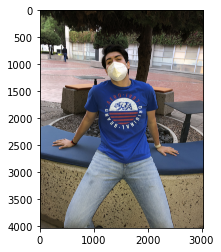

In [2]:
img = cv2.imread('IMG-3568.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.show()

In [3]:
img.shape

(4032, 3024, 3)

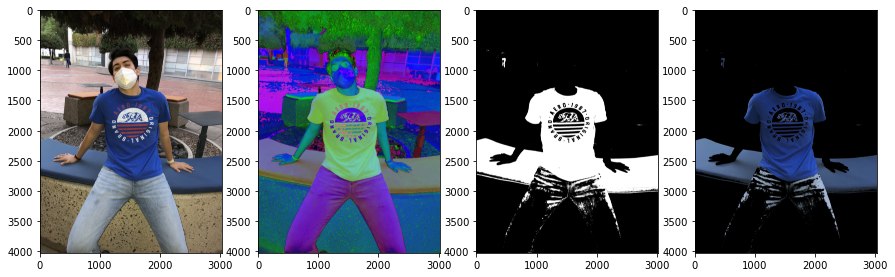

In [7]:
nrows,ncols,nch = img.shape
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lower = np.array([90, 50, 50])
upper = np.array([130, 255, 255])
mask_range = cv2.inRange(hsv, lower, upper)
img_mask = cv2.bitwise_and(img, img, mask=mask_range)

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(hsv)
plt.subplot(1,4,3)
plt.imshow(mask_range,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(img_mask)
plt.show()

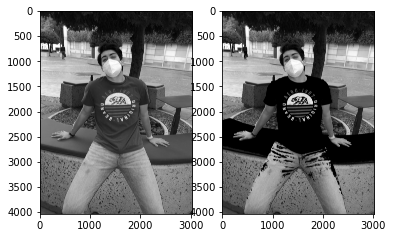

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img)
img_gray[:,:,0] = gray
img_gray[:,:,1] = gray
img_gray[:,:,2] = gray

gray_mask = cv2.bitwise_and(img_gray, img_gray, mask=~mask_range)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_gray)
plt.subplot(1,2,2)
plt.imshow(gray_mask)
plt.show()

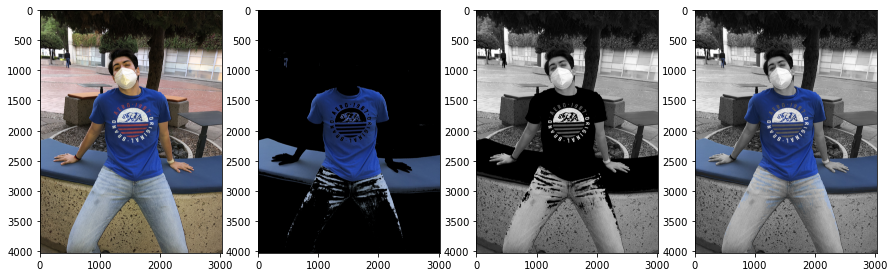

In [9]:
img_final = img_mask + gray_mask

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(img_mask)
plt.subplot(1,4,3)
plt.imshow(gray_mask)
plt.subplot(1,4,4)
plt.imshow(img_final)
plt.show()

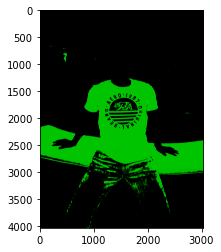

In [27]:
#verde
green = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_green = np.zeros_like(img)
img_green[:,:,1] = img_green[:,:,1]-60
#img_green[:,:,0] = img_green[:,:,0]-60

green_mask = cv2.bitwise_and(img_green, img_green, mask=mask_range)

plt.figure()
plt.imshow(green_mask)
plt.show()

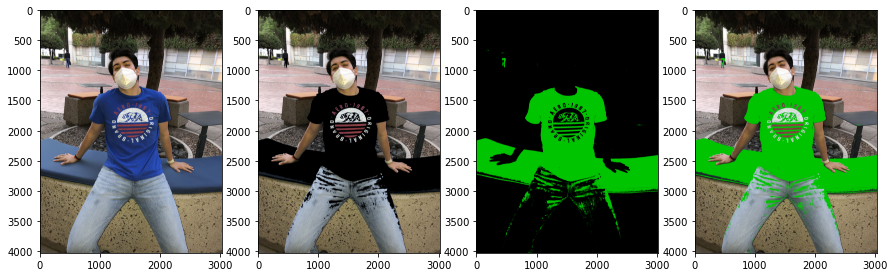

In [28]:
not_img_mask = cv2.bitwise_and(img, img, mask=~mask_range)
img_final = not_img_mask + green_mask

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(not_img_mask)
plt.subplot(1,4,3)
plt.imshow(green_mask)
plt.subplot(1,4,4)
plt.imshow(img_final)
plt.show()

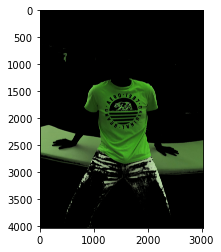

In [39]:
#otra forma
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

hue = img_hsv[:,:,0]
hue = hue - 60
img_hsv[:,:,0] = hue

img_hsv_mask = cv2.bitwise_and(img_hsv, img_hsv, mask=mask_range)

im = cv2.cvtColor(img_hsv_mask, cv2.COLOR_HSV2RGB)

plt.figure()
plt.imshow(im)
plt.show()

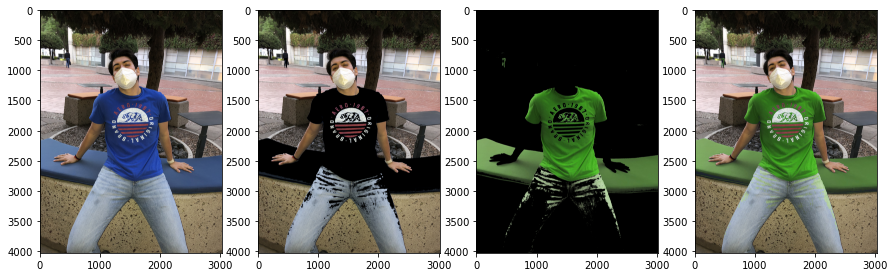

In [42]:
not_img_mask = cv2.bitwise_and(img, img, mask=~mask_range)
img_final_final = not_img_mask + im

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(not_img_mask)
plt.subplot(1,4,3)
plt.imshow(im)
plt.subplot(1,4,4)
plt.imshow(img_final_final)
plt.show()

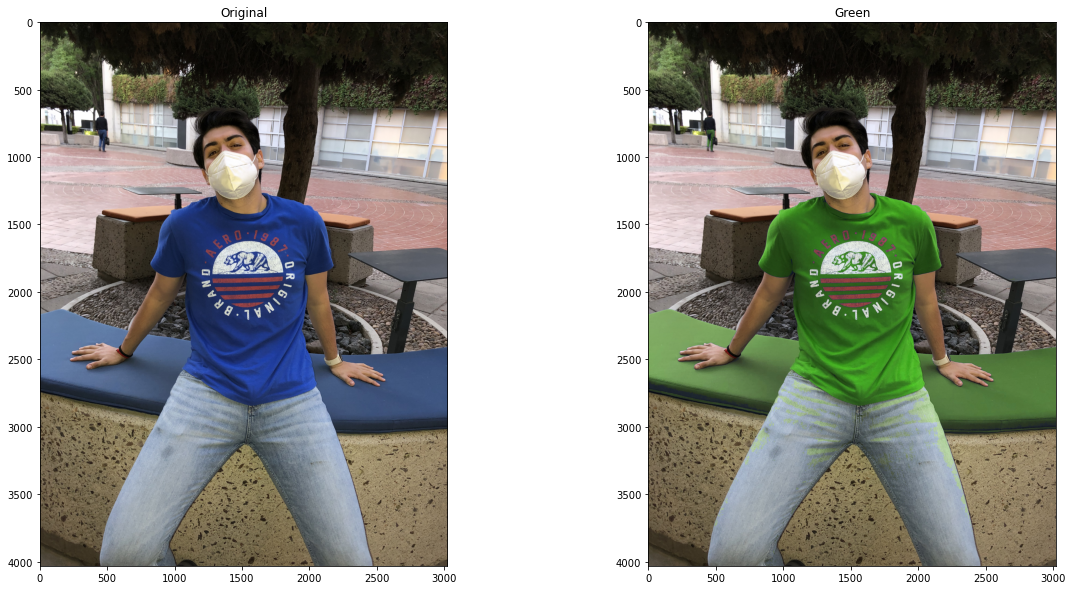

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Green")
plt.imshow(img_final_final)
plt.show()

In [ ]:
Esta es la imagen original vs la cambiada a verde. Como se puede apreciar en el proceso, se hizo una máscara sin sombras, 
pero no fue lo más adecuado. Luego ya se hizo la máscara con sombras y se aprecia mejor el cambio (aunque no es perfecto).